In [77]:

import os, sys, re, mne, pandas
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.realpath(os.path.pardir))

In [55]:
def get_datapaths(subject_path: str, stage_name: str) -> tuple[str, str, str]:
    content_path = os.path.join(subject_path, stage_name)
    subject_number = int(re.findall(r'\d+', subject_path)[-1])

    return os.path.join(content_path, f'{stage_name}_epochs_sel.fif'),\
        os.path.join(content_path, f'{stage_name}_EventFile_trls_sel.npy'),\
        os.path.join(content_path, f'sbj{subject_number}_{stage_name.lower()}.csv')

In [76]:
class Subject:
    def __init__(self, root: str, subject_name: str):
        self.name = subject_name
        self.home = os.path.join(root, self.name)

        if not os.path.isdir(self.home):
            raise OSError(f'Specified path is not a directory: {self.home}')

        self.paths = dict()
        self.data = dict()

    def select_stage(self, stage: str):
        stage = stage.lower()

        if stage == 'pretest':
            self.paths['epochs'], self.paths['events'], self.paths['behavioral'] = get_datapaths(self.home, 'PreTest')
        elif stage == 'posttest':
            self.paths['epochs'], self.paths['events'], self.paths['behavioral'] = get_datapaths(self.home, 'PostTest')
        elif stage == 'training':
            self.paths['epochs'], self.paths['events'], self.paths['behavioral'] = get_datapaths(self.home, 'Training')
        else:
            raise ValueError(f'Allowed stages are: \'pretest\', \'posttest\', \'training\', but \'{stage}\' is specified')

    def load(self):
        if not self.paths:
            raise ValueError(f'No path defined')

        self.data['epochs'] = mne.read_epochs(self.paths['epochs'])
        self.data['events'] = np.load(self.paths['events'])
        self.data['behavioral'] = pandas.read_csv(self.paths['behavioral'])

In [29]:
root = '/data/pt_02648/spatual/Preprocessed'
subject_name = 'sbj10'
stage_name = 'PostTest'

epochs_path, events_path, behavioral_path = get_datapaths(root, subject_name, stage_name)

In [ ]:
epochs = mne.read_epochs(epochs_path)

In [ ]:
%matplotlib qt
fig = epochs.plot()

In [39]:
events = np.load(events_path)

In [48]:
event_dict = dict(clue=102, stim=103, feedback=105)

In [47]:
behavioral.columns

Index(['Action', 'Missed', 'Outcome', 'Trial_n', 'SpatialCoordinates_1',
       'SpatialCoordinates_2', 'ConceptualCoordinates_1',
       'ConceptualCoordinates_2', 'Seed', 'RT', 'Feedback', 'CongruentDie',
       'CongruentGrow', 'Incongruent', 'CommonCoords', 'SpecificOld', 'old',
       'new', 'SpecificNew', 'center', 'unique', 'priming', 'notPriming',
       'D2_Distance', 'D1_Distance', 'D1F_Distance'],
      dtype='object')

In [44]:
behavioral = pandas.read_csv(behavioral_path)

In [ ]:
behavioral.Seed == 1

In [ ]:
events[:, 0] == 103

Reading /data/pt_02648/spatual/Preprocessed/sbj02/Training/Training_epochs_sel.fif ...


/tmp/ipykernel_9556/2467974597.py:28: RuntimeWarning: This filename (/data/pt_02648/spatual/Preprocessed/sbj02/Training/Training_epochs_sel.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  self.data['epochs'] = mne.read_epochs(self.paths['epochs'])


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
862 matching events found
No baseline correction applied
0 projection items activated
No projector specified for this dataset. Please consider the method self.add_proj.


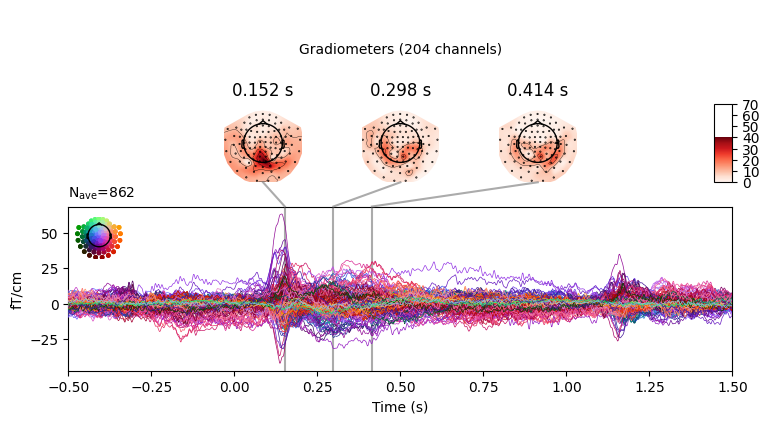

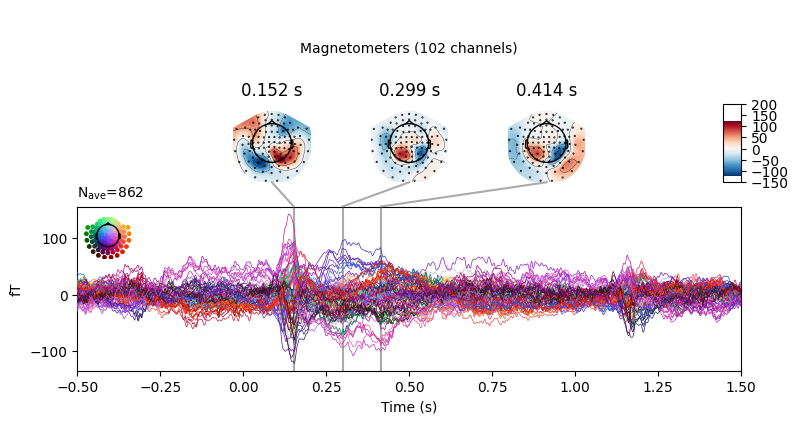

Reading /data/pt_02648/spatual/Preprocessed/sbj02/PreTest/PreTest_epochs_sel.fif ...


/tmp/ipykernel_9556/2467974597.py:28: RuntimeWarning: This filename (/data/pt_02648/spatual/Preprocessed/sbj02/PreTest/PreTest_epochs_sel.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  self.data['epochs'] = mne.read_epochs(self.paths['epochs'])


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Reading /data/pt_02648/spatual/Preprocessed/sbj02/PreTest/PreTest_epochs_sel-1.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
890 matching events found
No baseline correction applied
0 projection items activated
No projector specified for this dataset. Please consider the method self.add_proj.


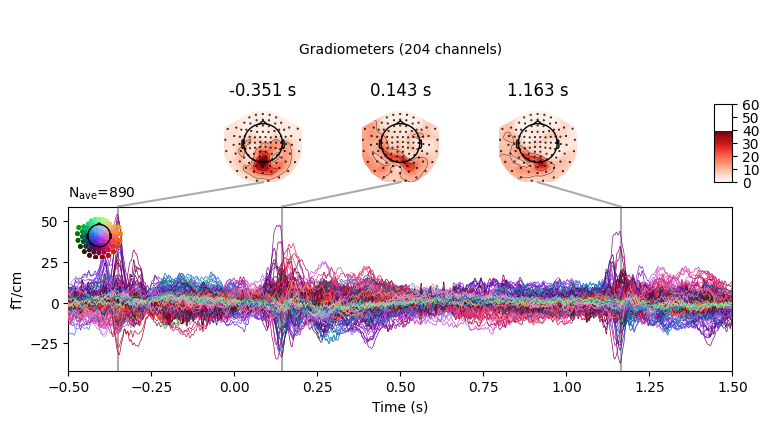

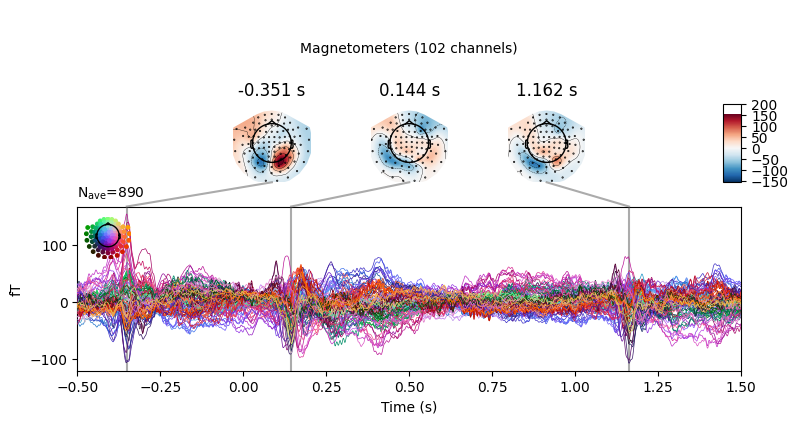

Reading /data/pt_02648/spatual/Preprocessed/sbj03/Training/Training_epochs_sel.fif ...


/tmp/ipykernel_9556/2467974597.py:28: RuntimeWarning: This filename (/data/pt_02648/spatual/Preprocessed/sbj03/Training/Training_epochs_sel.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  self.data['epochs'] = mne.read_epochs(self.paths['epochs'])


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available


KeyboardInterrupt: 

In [81]:
%matplotlib inline

root = '/data/pt_02648/spatual/Preprocessed'

for subject_name in sorted(os.listdir(root)):
    subject = Subject(root, subject_name)
    subject.select_stage(stage='training')
    subject.load()
    subject.data['epochs'].average().plot_joint()
    plt.show()
    subject.select_stage(stage='pretest')
    subject.load()
    subject.data['epochs'].average().plot_joint()
    plt.show()